In [29]:
import networkx as nx
nx.__version__

'2.1'

In [30]:
G = nx.DiGraph()
G.add_edges_from([('C', 'A'),
                  ('C', 'F'),
                  ('A', 'B'),
                  ('A', 'D'),
                  ('B', 'E'),
                  ('D', 'E'),
                  ('F', 'E'),])

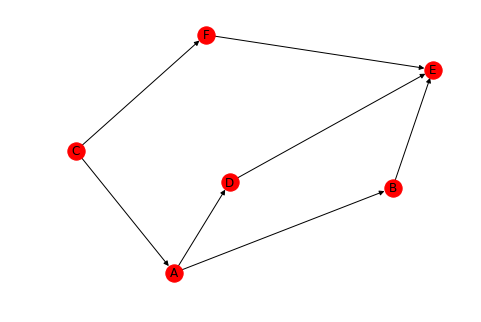

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

In [4]:
list(nx.topological_sort(G))

['C', 'F', 'A', 'B', 'D', 'E']

In [51]:
list(nx.ancestors(G, 'C'))

[]

In [83]:
lista = ['C', 'A', 'B']
listb = ['A', 'B']

# bool(set(listb).intersection(lista))
(set(listb) & set(lista)) == set(listb)


True

In [5]:
list(nx.lexicographical_topological_sort(G))

['C', 'A', 'B', 'D', 'F', 'E']

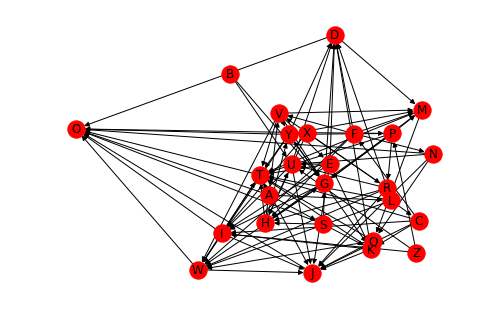

In [93]:
G = nx.DiGraph()

with open('input.txt', 'r') as f:
    for line in f:
        G.add_edge(line[5], line[36])
        
nx.draw(G, with_labels=True)

In [59]:
sequence = ''.join(list(nx.lexicographical_topological_sort(G)))
sequence

'ABLCFNSXZPRHVEGUYKDIMQTWJO'

# Part 2

In [103]:
import pandas as pd

index = [x for x in range(1, 1425)]
columns = [1, 2, 3, 4, 5]
times = [x+60 for x in range(1,27)]
time_dict = dict(zip(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), times))

sequence = list('ABLCFNSXZPRHVEGUYKDIMQTWJO')
completed_tasks = []

df = pd.DataFrame(index=index, columns=columns)

for ix in index:
    for worker in columns:
        if pd.isnull(df.loc[ix, worker]):
#             print('Idle worker, add task')
            try:
                completed_tasks.append(df.loc[ix-1, worker])
                if not pd.isnull(completed_tasks[-1]):
                    print(ix, 'Completed Task:', completed_tasks[-1])
            except:
                print(ix, 'Error')
                continue
            if sequence: 
                if not nx.ancestors(G, sequence[0]):
                    print(ix, 'Next Task:', sequence[0], 'Prereqs:', nx.ancestors(G, sequence[0]))
                    new_task = sequence.pop(0)
                    df.loc[ix:ix+time_dict[new_task]-1, worker] = new_task
                elif (set(nx.ancestors(G, sequence[0])) & set(completed_tasks)) == set(nx.ancestors(G, sequence[0])):
                    print(ix, 'Next Task:', sequence[0], 'Prereqs:', nx.ancestors(G, sequence[0]))
                    new_task = sequence.pop(0)
                    df.loc[ix:ix+time_dict[new_task]-1, worker] = new_task
                else:
                    continue
            else:
                break
        else:
            continue

# df.tail(50)
        
# 437, 438, 504 is too low

1 Error
1 Error
1 Error
1 Error
1 Error
2 Next Task: A Prereqs: set()
2 Next Task: B Prereqs: set()
63 Completed Task: A
63 Next Task: L Prereqs: {'A'}
64 Completed Task: B
135 Completed Task: L
135 Next Task: C Prereqs: {'A', 'L'}
198 Completed Task: C
198 Next Task: F Prereqs: {'C', 'A', 'L'}
264 Completed Task: F
264 Next Task: N Prereqs: {'C', 'F', 'L', 'A'}
264 Next Task: S Prereqs: {'A'}
264 Next Task: X Prereqs: set()
264 Next Task: Z Prereqs: set()
338 Completed Task: N
343 Completed Task: S
348 Completed Task: X
350 Completed Task: Z
350 Next Task: P Prereqs: {'Z', 'X'}
426 Completed Task: P
426 Next Task: R Prereqs: {'Z', 'P', 'A', 'X', 'L'}
504 Completed Task: R
504 Next Task: H Prereqs: {'Z', 'L', 'F', 'P', 'C', 'X', 'S', 'R', 'A'}
572 Completed Task: H
572 Next Task: V Prereqs: {'Z', 'L', 'F', 'P', 'C', 'X', 'H', 'S', 'R', 'A'}
654 Completed Task: V
654 Next Task: E Prereqs: {'Z', 'L', 'F', 'P', 'C', 'X', 'V', 'H', 'S', 'R', 'A'}
654 Next Task: G Prereqs: {'Z', 'L', 'F', '

In [68]:
df.iloc[480:550]

,1,2,3,4,5
481,J,O,NaN,NaN,NaN
482,J,O,NaN,NaN,NaN
483,J,O,NaN,NaN,NaN
484,J,O,NaN,NaN,NaN
485,NaN,O,NaN,NaN,NaN
486,NaN,O,NaN,NaN,NaN
487,NaN,O,NaN,NaN,NaN
488,NaN,O,NaN,NaN,NaN
489,NaN,O,NaN,NaN,NaN
490,NaN,O,NaN,NaN,NaN


In [104]:
nx.ancestors(G, 'X')

set()

In [73]:
df.to_csv('part2.csv')

In [16]:
val = 0

for k, v in time_dict.items():
    val += v

val

1911

In [92]:
import pandas as pd

G = nx.DiGraph()
G.add_edges_from([('C', 'A'),
                  ('C', 'F'),
                  ('A', 'B'),
                  ('A', 'D'),
                  ('B', 'E'),
                  ('D', 'E'),
                  ('F', 'E'),])

index = [x for x in range(1, 20)]
columns = [1, 2]
times = [x for x in range(1,7)]
time_dict = dict(zip(list('ABCDEF'), times))
# print(time_dict)

sequence = list('CABFDE')
completed_tasks = []

df = pd.DataFrame(index=index, columns=columns)

for ix in index:
    for worker in columns:
        if pd.isnull(df.loc[ix, worker]):
#             print('Idle worker, add task')
            try:
                completed_tasks.append(df.loc[ix-1, worker])
                if not pd.isnull(completed_tasks[-1]):
                    print(ix, 'Completed Task:', completed_tasks[-1])
            except:
                print(ix, 'Error')
                continue
            if sequence: 
                if not nx.ancestors(G, sequence[0]):
                    print(ix, 'Next Task:', sequence[0])
                    new_task = sequence.pop(0)
                    df.loc[ix:ix+time_dict[new_task]-1, worker] = new_task
                elif (set(nx.ancestors(G, sequence[0])) & set(completed_tasks)) == set(nx.ancestors(G, sequence[0])):
                    # TODO: I have to check to ensure that all precursor activities are complete!
                    print(ix, 'Next Task:', sequence[0])
                    new_task = sequence.pop(0)
                    df.loc[ix:ix+time_dict[new_task]-1, worker] = new_task
                else:
                    continue
            else:
                break
        else:
            continue

# df

1 Error
1 Error
2 Next Task: C
5 Completed Task: C
5 Next Task: A
6 Completed Task: A
6 Next Task: B
6 Next Task: F
8 Completed Task: B
8 Next Task: D
12 Completed Task: D
12 Completed Task: F
12 Next Task: E
